In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 


In [7]:
df = pd.read_csv(r"C:\Users\henri\OneDrive\Documents\GitHub\Projects\EPL_Analysis\2021-2022.csv")
df

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,13/08/2021,20:00,Brentford,Arsenal,2,0,H,1,0,...,1.62,0.50,1.75,2.05,1.81,2.13,2.05,2.17,1.80,2.09
1,E0,14/08/2021,12:30,Man United,Leeds,5,1,H,1,0,...,2.25,-1.00,2.05,1.75,2.17,1.77,2.19,1.93,2.10,1.79
2,E0,14/08/2021,15:00,Burnley,Brighton,1,2,A,1,0,...,1.62,0.25,1.79,2.15,1.81,2.14,1.82,2.19,1.79,2.12
3,E0,14/08/2021,15:00,Chelsea,Crystal Palace,3,0,H,2,0,...,1.94,-1.50,2.05,1.75,2.12,1.81,2.16,1.93,2.06,1.82
4,E0,14/08/2021,15:00,Everton,Southampton,3,1,H,0,1,...,1.67,-0.50,2.05,1.88,2.05,1.88,2.08,1.90,2.03,1.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,E0,22/05/2022,16:00,Crystal Palace,Man United,1,0,H,1,0,...,2.04,0.25,1.68,2.15,1.74,2.23,1.88,2.25,1.74,2.16
376,E0,22/05/2022,16:00,Leicester,Southampton,4,1,H,0,0,...,2.63,-0.75,1.83,2.07,1.88,2.03,1.94,2.26,1.87,2.01
377,E0,22/05/2022,16:00,Liverpool,Wolves,3,1,H,1,1,...,3.28,-2.50,2.02,1.77,2.06,1.83,2.19,1.99,2.07,1.80
378,E0,22/05/2022,16:00,Man City,Aston Villa,3,2,H,0,1,...,3.36,-2.25,2.06,1.84,2.05,1.86,2.09,2.03,2.01,1.87


In [8]:

columns_to_keep = ['Referee', 'HY', 'AY', 'HR', 'AR']
referee_cards_totals = df[columns_to_keep]
referee_cards_totals

,Referee,HY,AY,HR,AR
0,M Oliver,0,0,0,0
1,P Tierney,1,2,0,0
2,D Coote,2,1,0,0
3,J Moss,0,0,0,0
4,A Madley,2,0,0,0
...,...,...,...,...,...
375,M Atkinson,2,4,0,0
376,J Moss,0,1,0,0
377,A Taylor,1,0,0,0
378,M Oliver,0,1,0,0


In [9]:
referee_totals = referee_cards_totals.groupby('Referee').sum()
referee_totals['Yellow_Cards_Total'] = referee_totals['HY'] + referee_totals['AY']
referee_totals['Red_Cards_Total'] = referee_totals['HR'] + referee_totals['AR']
referee_totals

,HY,AY,HR,AR,Yellow_Cards_Total,Red_Cards_Total
Referee,,,,,,
A Madley,16,20,0,2,36,2
A Marriner,27,34,2,0,61,2
A Taylor,50,51,3,2,101,5
C Kavanagh,30,38,2,1,68,3
C Pawson,51,56,2,0,107,2
D Coote,43,47,1,1,90,2
D England,25,33,0,1,58,1
G Scott,21,18,0,1,39,1
J Brooks,11,10,0,0,21,0


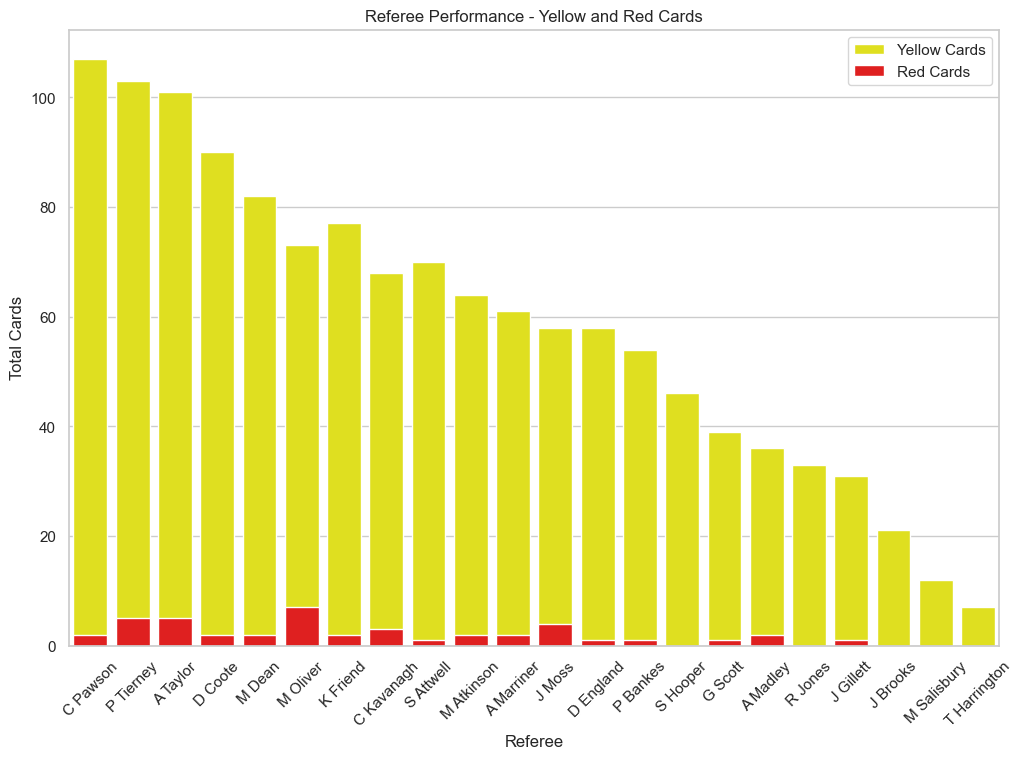

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


referee_totals['Total_Cards'] = referee_totals['Yellow_Cards_Total'] + referee_totals['Red_Cards_Total']

referee_totals_sorted = referee_totals.sort_values(by='Total_Cards', ascending=False)

sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# Bar chart for Yellow and Red Cards
sns.barplot(x=referee_totals_sorted.index, y='Yellow_Cards_Total', data=referee_totals_sorted, color='yellow', label='Yellow Cards')
sns.barplot(x=referee_totals_sorted.index, y='Red_Cards_Total', data=referee_totals_sorted, color='red', label='Red Cards')

plt.title('Referee Performance - Yellow and Red Cards')
plt.xlabel('Referee')
plt.ylabel('Total Cards')
plt.legend()
plt.xticks(rotation=45)
plt.show()



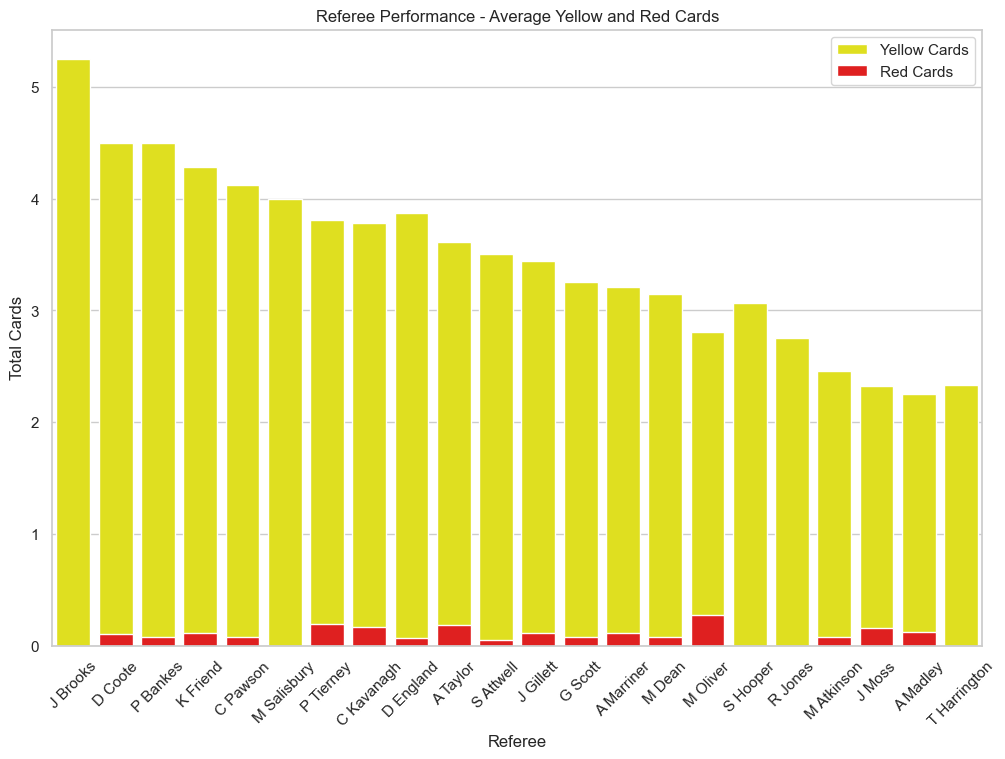

In [29]:
# A fairer analysis would be to compare the number of each card each referee issued per game 
dated_columns_to_keep = ['Date','Referee', 'HY', 'AY', 'HR', 'AR']
referee_cards_per_date = df[dated_columns_to_keep]
matches_per_referee = referee_cards_per_date.groupby('Referee')['Date'].nunique()

referee_totals = referee_totals.groupby('Referee').agg({
    'HY': 'sum',
    'AY': 'sum',
    'HR': 'sum',
    'AR': 'sum',
    'Yellow_Cards_Total': 'sum',
    'Red_Cards_Total': 'sum'})
referee_totals['Match_Count']= matches_per_referee

referee_totals['Yellow_Cards_Per_Match'] = (referee_totals['Yellow_Cards_Total']/referee_totals['Match_Count']).round(2)
referee_totals['Red_Cards_Per_Match'] = (referee_totals['Red_Cards_Total']/referee_totals['Match_Count']).round(2)

referee_totals['Total_Average_Cards'] = referee_totals['Yellow_Cards_Per_Match'] + referee_totals['Red_Cards_Per_Match']

referee_totals_sorted = referee_totals.sort_values(by='Total_Average_Cards', ascending=False)

sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

sns.barplot(x=referee_totals_sorted.index, y='Yellow_Cards_Per_Match', data=referee_totals_sorted, color='yellow', label='Yellow Cards')
sns.barplot(x=referee_totals_sorted.index, y='Red_Cards_Per_Match', data=referee_totals_sorted, color='red', label='Red Cards')

plt.title('Referee Performance - Average Yellow and Red Cards')
plt.xlabel('Referee')
plt.ylabel('Total Cards')
plt.legend()
plt.xticks(rotation=45)
plt.show()

